In [18]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
import pandas_datareader as web
plt.style.use("fivethirtyeight")
import datetime as dt
import yfinance as yf

In [19]:
company = 'KONTR.IS'

# Bir başlangıç ​​tarihi ve Bitiş Tarihi tanımlayın
start = dt.datetime(2020,1,1)
end =  dt.datetime(2023,5,1)

# Hisse Senedi Fiyat Verilerini Oku
df = yf.download(company, start , end)

df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-20,169.399994,179.000000,160.899994,160.899994,160.899994,8285498
2023-03-21,160.899994,163.800003,155.399994,156.000000,156.000000,4499503
2023-03-22,157.000000,159.100006,150.899994,151.399994,151.399994,3724149
2023-03-23,153.000000,156.000000,150.600006,152.300003,152.300003,2668745
2023-03-24,154.000000,156.500000,152.300003,152.800003,152.800003,2597174
2023-03-27,153.000000,157.699997,149.500000,153.899994,153.899994,4171110
2023-03-28,155.600006,156.899994,143.500000,145.000000,145.000000,3363663
2023-03-29,145.000000,147.000000,141.100006,146.199997,146.199997,3125048
2023-03-30,146.899994,151.399994,146.199997,147.500000,147.500000,2641652


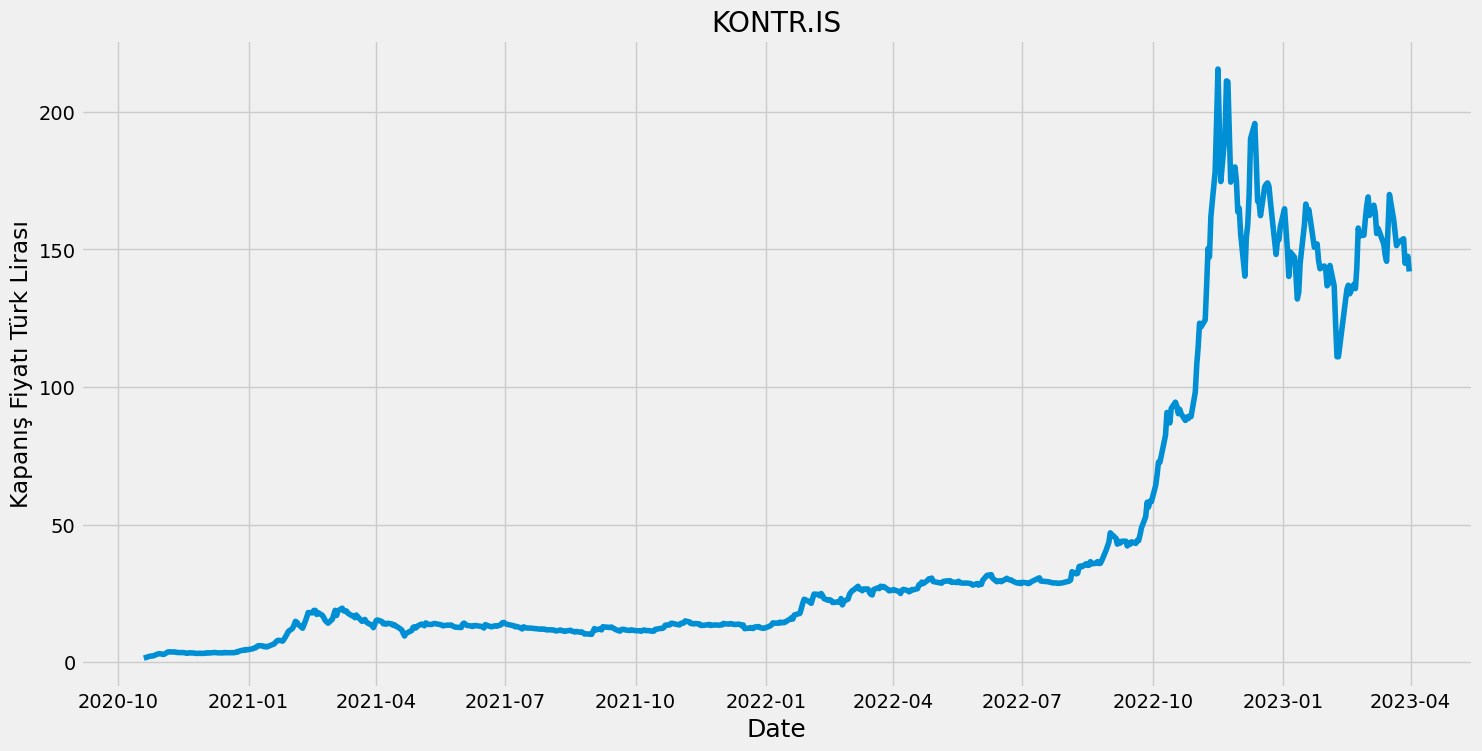

In [20]:
#Verileri filtrele
data = df.filter(["Close"])

#Görselleştirme
plt.figure(figsize=(16,8))
plt.plot(data["Close"])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası")
plt.title("KONTR.IS")
plt.show()

In [21]:
#Yalnızca Kapat sütunuyla yeni bir DataFrame oluştur
data = df.filter(["Close"])

#Veri çerçevesini bir numpy dizisine dönüştür
dataset = data.values

#Modeli eğitmek için satır sayısını al
training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

493


In [22]:
#Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00000000e+00],
       [6.66501589e-04],
       [1.40409160e-03],
       [2.21277951e-03],
       [3.10144161e-03],
       [4.07897483e-03],
       [5.15425880e-03],
       [6.33618432e-03],
       [7.64252071e-03],
       [6.25620066e-03],
       [7.55365517e-03],
       [8.97551833e-03],
       [1.05395684e-02],
       [1.06373202e-02],
       [1.03618339e-02],
       [1.05839989e-02],
       [9.72199467e-03],
       [9.56203625e-03],
       [9.44650837e-03],
       [9.41984938e-03],
       [8.93108333e-03],
       [8.42454573e-03],
       [8.17571731e-03],
       [9.06438387e-03],
       [8.67336858e-03],
       [8.30013152e-03],
       [8.00687256e-03],
       [8.13128677e-03],
       [8.16683098e-03],
       [8.00687256e-03],
       [8.53118282e-03],
       [8.35345174e-03],
       [9.23322862e-03],
       [8.67336858e-03],
       [9.30432150e-03],
       [9.56203625e-03],
       [9.19768441e-03],
       [8.98440466e-03],
       [8.93108333e-03],
       [8.84221779e-03],


In [23]:
#Eğitim veri setini oluştur
#Ölçeklendirilmiş eğitim veri setini oluştur

train_data = scaled_data[0:training_data_len,:]

#Verileri x_train ve y_train veri kümelerine ayırın
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.0006665 , 0.00140409, 0.00221278, 0.00310144,
       0.00407897, 0.00515426, 0.00633618, 0.00764252, 0.0062562 ,
       0.00755366, 0.00897552, 0.01053957, 0.01063732, 0.01036183,
       0.010584  , 0.00972199, 0.00956204, 0.00944651, 0.00941985,
       0.00893108, 0.00842455, 0.00817572, 0.00906438, 0.00867337,
       0.00830013, 0.00800687, 0.00813129, 0.00816683, 0.00800687,
       0.00853118, 0.00835345, 0.00923323, 0.00867337, 0.00930432,
       0.00956204, 0.00919768, 0.0089844 , 0.00893108, 0.00884222,
       0.00969534, 0.00916214, 0.00923323, 0.00917102, 0.00916214,
       0.00921546, 0.01029074, 0.01005969, 0.01172149, 0.01355214,
       0.01321445, 0.01449413, 0.01417421, 0.01595154, 0.01730231,
       0.01764   , 0.02009271, 0.02121243, 0.02075033, 0.01925737])]
[0.019914983289964272]



In [24]:
#x_train ve y_train'i numpy dizilerine dönüştür
x_train,y_train = np.array(x_train),np.array(y_train)

In [25]:
#Verileri yeniden şekillendir
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(433, 60, 1)

In [26]:
#LSTM Modelini Oluşturun
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1)) 

In [27]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [28]:
model.fit(x_train,y_train,batch_size=1, epochs=1)


433/433 [==============================] - 8s 14ms/step - loss: 6.7465e-04


In [29]:
#Test veri setini oluştur
#1543'ten 2003'e ölçeklenmiş değerler içeren yeni bir dizi oluştur

test_data = scaled_data[training_data_len - 60:, :]

#x_test ve y_test veri kümelerini oluştur

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [30]:
#Verileri bir numpy dizisine dönüştür
x_test = np.array(x_test)

In [31]:
#Verileri yeniden şekillendir
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [32]:
#Modellerin tahmin edilen fiyat değerlerini alın
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 10ms/step


In [33]:
#Kök ortalama kare hatasını al (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

57.07421074843988

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_14840\1319487025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


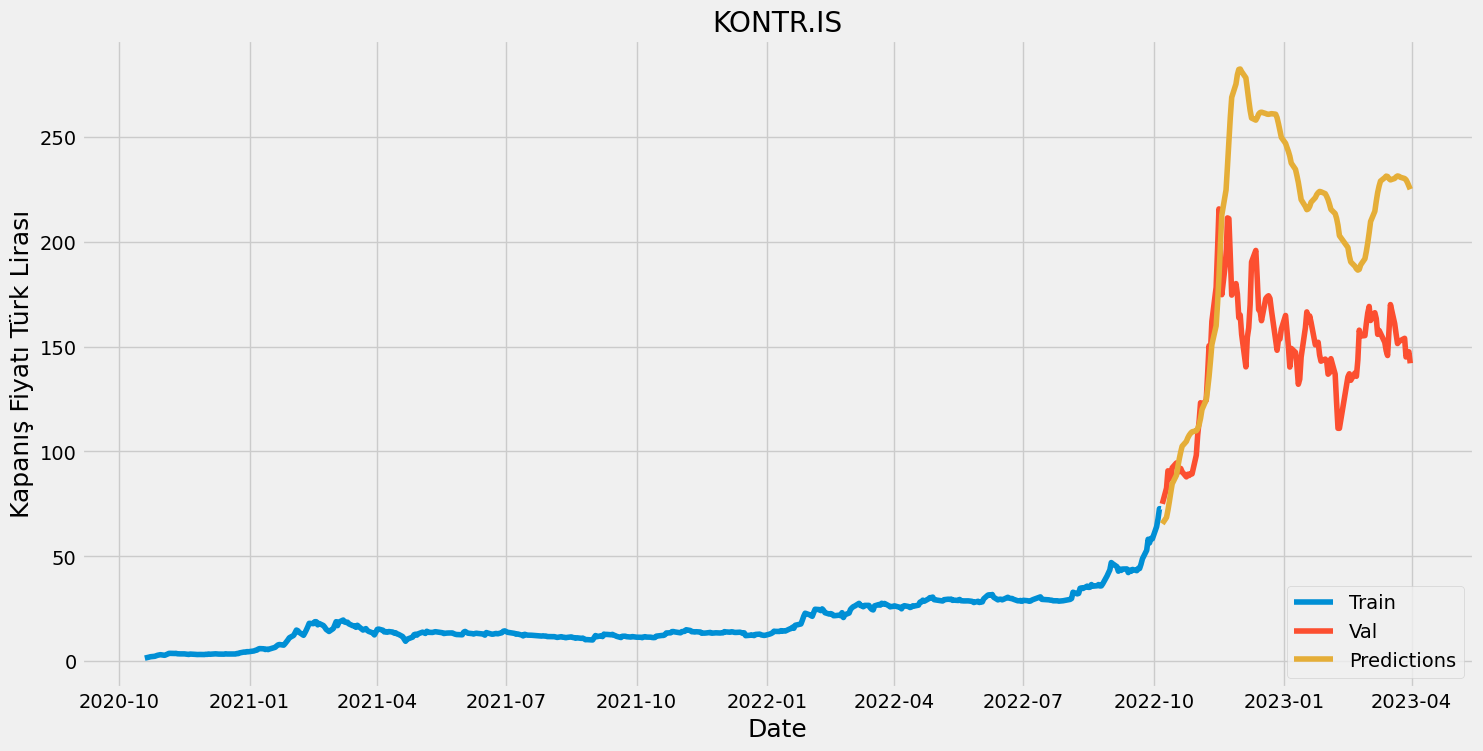

In [34]:
#Verileri çiz
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

#Verileri görselleştirin
plt.figure(figsize=(16,8))
plt.title("KONTR.IS")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Kapanış Fiyatı Türk Lirası",fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Train","Val","Predictions"], loc="lower right")
plt.show()